# DA Project #2

In [111]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import pingouin as pg
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import expit

In [2]:
# load dataset
df = pd.read_csv('../data/movieReplicationSet.csv')  # Replace with your actual file path

In [3]:
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [4]:
df_imputed = pd.read_csv('../data/movieReplicationSet.csv')

In [5]:
"""imputing data"""

# Calculate Row Means (ignoring NaNs)
row_means = df_imputed.mean(axis=1)

# Calculate Column Means (ignoring NaNs)
column_means = df_imputed.mean(axis=0)

In [6]:
#Impute Missing Values

for col in df_imputed.columns[0:400]:
    df_imputed[col] = df_imputed.apply(lambda x: (row_means[x.name] + column_means[col]) / 2 if pd.isna(x[col]) else x[col], axis=1)

In [7]:
df_imputed

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,2.531137,2.466043,4.000000,2.809286,3.000000,2.754308,2.638172,2.905283,2.703655,2.911262,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,2.535254,2.470159,1.500000,2.813402,2.848905,2.758424,2.642288,2.909399,2.707771,2.915378,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,2.635754,2.570660,3.136807,2.913902,2.949405,2.858924,2.742788,3.009899,2.808271,3.015878,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,2.468740,2.403645,2.000000,2.746888,3.000000,2.691910,2.575774,2.842885,2.641257,4.000000,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,2.379504,2.314410,3.500000,2.657652,0.500000,2.602674,0.500000,1.000000,2.552021,0.000000,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.677848,2.612753,3.178901,2.955996,3.500000,2.901018,2.784882,3.051993,2.850365,3.057972,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.000000,4.000000,3.450559,3.227654,4.000000,4.000000,2.500000,3.323651,3.500000,3.500000,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,2.672533,2.607438,3.173586,2.950681,2.986184,2.895703,2.779567,3.500000,2.845050,3.052657,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,2.743089,2.677995,3.244142,3.021237,3.056740,2.966259,2.850124,3.117234,2.915606,3.123214,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [8]:
"""commenting out so that it doesn't get saved again every time I rerun the notebook"""

# Save the imputed dataset to a new CSV file

# df_imputed.to_csv('../data/movieReplicationSet_replacednan.csv', index=False)  # Specify your desired output file path

"commenting out so that it doesn't get saved again every time I rerun the notebook"

In [9]:
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


## 5) Compute the average movie enjoyment for each user (using only real, non-imputed data). Use these averages as the predictor variable X in a logistic regression model. Sort the movies order of increasing rating (also using only real, non-imputed data). Now pick the 4 movies in the middle of the score range as your target movie. For each of them, do a media split (now using the imputed data) of ratings to code movies above the median rating with the Y label 1 (= enjoyed) and movies below the median with the label 0 (= not enjoyed). For each of these movies, build a logistic regression model (using X to predict Y), show figures with the outcomes and report the betas as well as the AUC values. Comment on the quality of your models. Make sure to use cross-validation methods to avoid overfitting.

In [10]:
#Since we are only focusing on ratings, drop all irrelevant columns for both datasets

ratings = df.iloc[:, :400]

ratings_imputed = df_imputed.iloc[:, :400]

In [11]:
# ratings = ratings.dropna(axis = 0, how = 'all', inplace = True)

In [12]:
ratings

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,4.0,NaN,4.0,3.5,3.5,4.0,3.5,4.0,4.0,4.0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN


In [13]:
ratings_imputed

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,2.531137,2.466043,4.000000,2.809286,3.000000,2.754308,2.638172,2.905283,2.703655,2.911262,...,2.912511,3.005998,2.735002,4.000000,0.500000,2.594824,2.603207,2.656629,2.512857,2.624461
1,2.535254,2.470159,1.500000,2.813402,2.848905,2.758424,2.642288,2.909399,2.707771,2.915378,...,2.916627,3.010114,2.739119,2.769072,4.000000,2.598940,2.607323,2.660745,2.516973,2.628577
2,2.635754,2.570660,3.136807,2.913902,2.949405,2.858924,2.742788,3.009899,2.808271,3.015878,...,3.017127,3.110614,2.839619,2.869572,3.500000,2.699440,2.707823,2.761246,2.617473,2.729078
3,2.468740,2.403645,2.000000,2.746888,3.000000,2.691910,2.575774,2.842885,2.641257,4.000000,...,2.850113,3.000000,2.672604,2.702558,2.500000,2.532426,2.540809,2.594231,2.450459,2.562063
4,2.379504,2.314410,3.500000,2.657652,0.500000,2.602674,0.500000,1.000000,2.552021,0.000000,...,2.500000,2.854364,3.000000,2.613322,2.940075,2.443190,2.451573,1.500000,2.361223,2.472828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.677848,2.612753,3.178901,2.955996,3.500000,2.901018,2.784882,3.051993,2.850365,3.057972,...,3.059221,3.152708,2.881712,2.911666,4.000000,2.741534,2.749917,2.803339,2.659567,2.771171
1093,3.000000,4.000000,3.450559,3.227654,4.000000,4.000000,2.500000,3.323651,3.500000,3.500000,...,4.000000,3.424366,4.000000,3.500000,3.500000,4.000000,3.500000,4.000000,4.000000,4.000000
1094,2.672533,2.607438,3.173586,2.950681,2.986184,2.895703,2.779567,3.500000,2.845050,3.052657,...,3.053906,3.147393,2.876398,2.906351,4.000000,2.736219,2.744602,2.798024,2.654252,2.765856
1095,2.743089,2.677995,3.244142,3.021237,3.056740,2.966259,2.850124,3.117234,2.915606,3.123214,...,3.124462,3.217949,2.946954,2.976907,2.500000,2.806775,2.815158,2.868581,2.724808,2.836413


In [14]:
"""when I went on to do the logistic regression I found out there was something wrong with the df. Apparently there's one row with all Nan's"""

#check for rows with all Nan's in original data

nan_row_indices = ratings[ratings.isna().all(axis=1)].index

nan_row_indices_list = nan_row_indices.tolist()
nan_row_indices_list

[896]

In [15]:
#drop the row with all Nan values because it provides no useful information and can't be used in building/validating the recommendation system (plus the code wouldn't run with it in the data)

ratings = ratings.dropna(axis = 0, how = 'all')
ratings

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,4.0,NaN,4.0,3.5,3.5,4.0,3.5,4.0,4.0,4.0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN


In [16]:
#since we dropped the row with the index of 896 in the original data, we have to match it in the imputed data bc building the logistic model requires X and Y to be of the same shape or it returns an error

ratings_imputed = ratings_imputed.drop(index=896)
ratings_imputed

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,2.531137,2.466043,4.000000,2.809286,3.000000,2.754308,2.638172,2.905283,2.703655,2.911262,...,2.912511,3.005998,2.735002,4.000000,0.500000,2.594824,2.603207,2.656629,2.512857,2.624461
1,2.535254,2.470159,1.500000,2.813402,2.848905,2.758424,2.642288,2.909399,2.707771,2.915378,...,2.916627,3.010114,2.739119,2.769072,4.000000,2.598940,2.607323,2.660745,2.516973,2.628577
2,2.635754,2.570660,3.136807,2.913902,2.949405,2.858924,2.742788,3.009899,2.808271,3.015878,...,3.017127,3.110614,2.839619,2.869572,3.500000,2.699440,2.707823,2.761246,2.617473,2.729078
3,2.468740,2.403645,2.000000,2.746888,3.000000,2.691910,2.575774,2.842885,2.641257,4.000000,...,2.850113,3.000000,2.672604,2.702558,2.500000,2.532426,2.540809,2.594231,2.450459,2.562063
4,2.379504,2.314410,3.500000,2.657652,0.500000,2.602674,0.500000,1.000000,2.552021,0.000000,...,2.500000,2.854364,3.000000,2.613322,2.940075,2.443190,2.451573,1.500000,2.361223,2.472828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.677848,2.612753,3.178901,2.955996,3.500000,2.901018,2.784882,3.051993,2.850365,3.057972,...,3.059221,3.152708,2.881712,2.911666,4.000000,2.741534,2.749917,2.803339,2.659567,2.771171
1093,3.000000,4.000000,3.450559,3.227654,4.000000,4.000000,2.500000,3.323651,3.500000,3.500000,...,4.000000,3.424366,4.000000,3.500000,3.500000,4.000000,3.500000,4.000000,4.000000,4.000000
1094,2.672533,2.607438,3.173586,2.950681,2.986184,2.895703,2.779567,3.500000,2.845050,3.052657,...,3.053906,3.147393,2.876398,2.906351,4.000000,2.736219,2.744602,2.798024,2.654252,2.765856
1095,2.743089,2.677995,3.244142,3.021237,3.056740,2.966259,2.850124,3.117234,2.915606,3.123214,...,3.124462,3.217949,2.946954,2.976907,2.500000,2.806775,2.815158,2.868581,2.724808,2.836413


In [17]:
#mean movie ratings for all users as viewer enjoyment (original data)

viewer_enjoyment = ratings.mean(axis=1)
viewer_enjoyment

0       2.742857
1       2.727273
2       3.314815
3       2.414634
4       2.266949
          ...   
1092    3.200000
1093    3.673669
1094    3.132530
1095    3.390625
1096    2.873874
Length: 1096, dtype: float64

In [18]:
np.isnan(viewer_enjoyment).any()

False

In [19]:
average_movie_ratings = ratings.mean().sort_values()
average_movie_ratings

3000 Miles to Graceland (2001)     1.915584
North (1994)                       1.929487
Barb Wire (1996)                   1.966667
Battlefield Earth (2000)           2.006757
In America (2002)                  2.006944
                                     ...   
Good Will Hunting (1997)           3.362403
The Shawshank Redemption (1994)    3.378827
Finding Nemo (2003)                3.388067
Spirited Away (2001)               3.414207
The Lion King (1994)               3.459979
Length: 400, dtype: float64

In [20]:
np.isnan(average_movie_ratings).any()

False

In [21]:
#get the middle four movies based on median

middle_movies_indices = len(average_movie_ratings) // 2
middle_four_movies = average_movie_ratings.iloc[middle_movies_indices - 2: middle_movies_indices + 2].index

middle_four_movies

Index(['Fahrenheit 9/11 (2004)', 'Happy Gilmore (1996)',
       'Diamonds are Forever (1971)', 'Scream (1996)'],
      dtype='object')

In [22]:
# "as indicated, movie enjoyment will be the predictor x here"

# #for non imputed data, calculate (row) average rating for each user (operationalized as their average movie enjoyment here) and add a new column for that

# ratings["enjoyment"] = ratings.mean(axis=1)
# ratings

In [23]:
# #calculate average movie rating and add that as a row, for the enjoyment column, it would be the mean enjoyment score

# ratings.loc['mean']=ratings.mean(axis=0)
# ratings

In [24]:
# #disregard the enjoyment column and sort the movies base on their mean ratings in asencding order

# movie_ratings_sorted = ratings.iloc[:, :400].sort_values(by = 'mean', axis = 1) 
# movie_ratings_sorted

In [25]:
#use imputed data for binary coding

for movie in middle_four_movies:
    # find the median rating for the movie
    median_rating = ratings_imputed[movie].median()

    # binary labels where 1 is above median and 0 is below median and add it as a new column
    ratings_imputed[f'{movie}_label'] = ratings_imputed[movie].apply(lambda x: 1 if x > median_rating else 0)

In [26]:
ratings_imputed

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989),Fahrenheit 9/11 (2004)_label,Happy Gilmore (1996)_label,Diamonds are Forever (1971)_label,Scream (1996)_label
0,2.531137,2.466043,4.000000,2.809286,3.000000,2.754308,2.638172,2.905283,2.703655,2.911262,...,0.500000,2.594824,2.603207,2.656629,2.512857,2.624461,0,1,0,0
1,2.535254,2.470159,1.500000,2.813402,2.848905,2.758424,2.642288,2.909399,2.707771,2.915378,...,4.000000,2.598940,2.607323,2.660745,2.516973,2.628577,0,0,0,0
2,2.635754,2.570660,3.136807,2.913902,2.949405,2.858924,2.742788,3.009899,2.808271,3.015878,...,3.500000,2.699440,2.707823,2.761246,2.617473,2.729078,1,1,1,1
3,2.468740,2.403645,2.000000,2.746888,3.000000,2.691910,2.575774,2.842885,2.641257,4.000000,...,2.500000,2.532426,2.540809,2.594231,2.450459,2.562063,0,0,0,0
4,2.379504,2.314410,3.500000,2.657652,0.500000,2.602674,0.500000,1.000000,2.552021,0.000000,...,2.940075,2.443190,2.451573,1.500000,2.361223,2.472828,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.677848,2.612753,3.178901,2.955996,3.500000,2.901018,2.784882,3.051993,2.850365,3.057972,...,4.000000,2.741534,2.749917,2.803339,2.659567,2.771171,1,1,1,1
1093,3.000000,4.000000,3.450559,3.227654,4.000000,4.000000,2.500000,3.323651,3.500000,3.500000,...,3.500000,4.000000,3.500000,4.000000,4.000000,4.000000,1,1,1,1
1094,2.672533,2.607438,3.173586,2.950681,2.986184,2.895703,2.779567,3.500000,2.845050,3.052657,...,4.000000,2.736219,2.744602,2.798024,2.654252,2.765856,1,1,1,1
1095,2.743089,2.677995,3.244142,3.021237,3.056740,2.966259,2.850124,3.117234,2.915606,3.123214,...,2.500000,2.806775,2.815158,2.868581,2.724808,2.836413,1,1,1,1


In [ ]:
# Assuming X_train is a 2D numpy array
# Create a range of values from the minimum to the maximum X_train values
x_values = np.linspace(X_train.min(), X_train.max(), 300).reshape(-1, 1)

# Predict probabilities for these values
y_probs = log_reg.predict_proba(x_values)[:, 1]

# Plot the sigmoid curve
plt.plot(x_values, y_probs, label='Logistic Regression', color='blue')

# Plot the scatter plot of the actual data
plt.scatter(X_train, Y_train, color='red', label='Actual data')

# Label the plot
plt.title(f'Logistic Regression Model for {movie}')
plt.xlabel('Movie Rating')
plt.ylabel('Probability of Enjoyment')
plt.legend()

# Show the plot
plt.show()


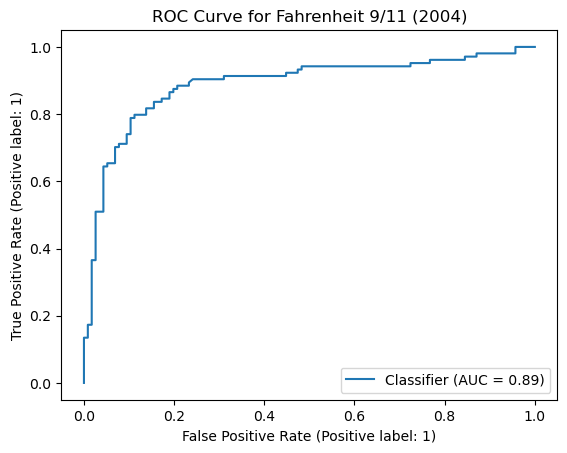

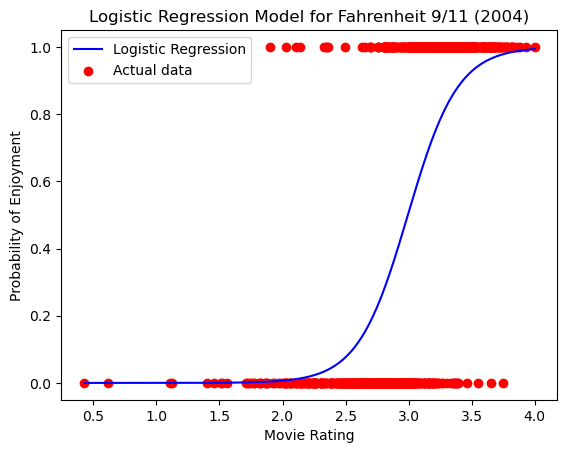

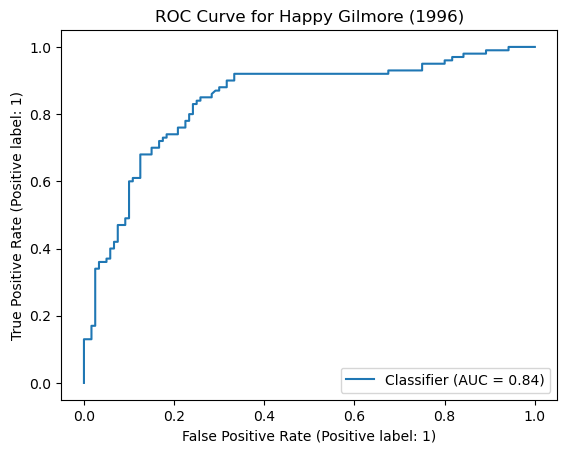

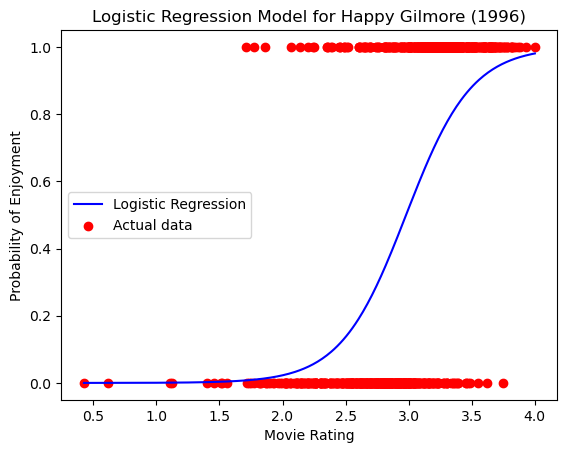

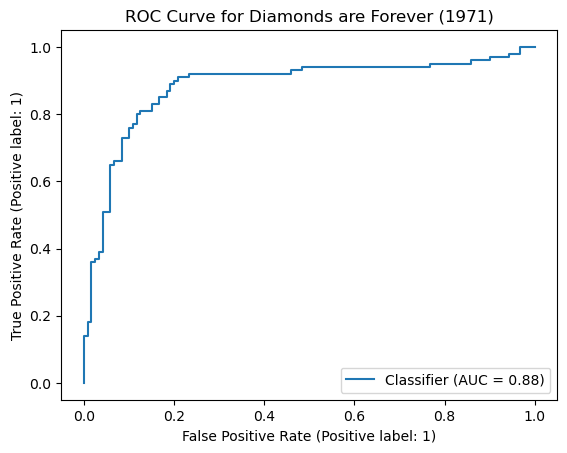

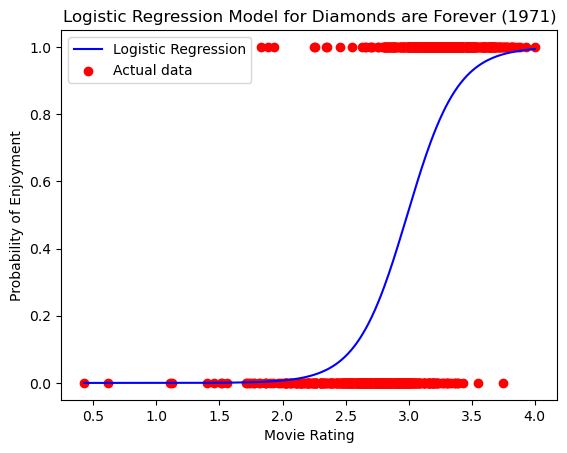

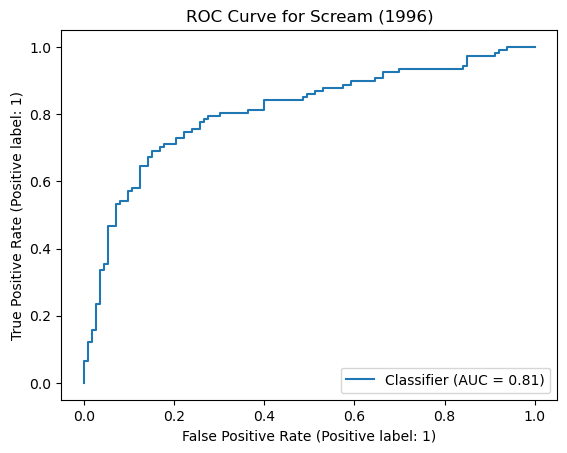

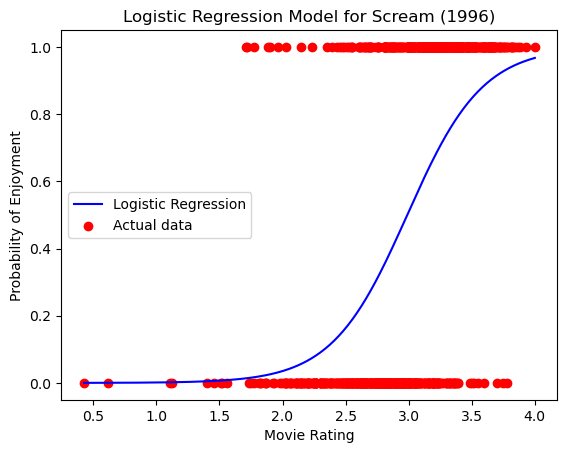

In [134]:
#for the selected four movies, build a logistic regression model (using user enjoyment to predict binary label)

results = {}
X = viewer_enjoyment

for movie in middle_four_movies:
    # Prepare the target variable Y
    Y = ratings_imputed[f'{movie}_label']

    # Splitting the data for cross validation
    X_train, X_test, Y_train, Y_test = train_test_split(X.values.reshape(-1, 1), Y, test_size=0.2, random_state=0)

    # Initialize the logistic regression model
    log_reg = LogisticRegression()

    # Cross-validation, k fold with 5 splits
    cv_scores = cross_val_score(log_reg, X_train, Y_train, cv=5, scoring='roc_auc')

    # Fit the model
    log_reg.fit(X_train, Y_train)

    # Predict probabilities and calculate AUC
    Y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(Y_test, Y_pred_proba)

    # Plot ROC Curve
    RocCurveDisplay.from_predictions(Y_test, Y_pred_proba)
    plt.title(f'ROC Curve for {movie}')
    plt.show()
    
    #plot lositic regression
    # Assuming X_train is a 2D numpy array
    # Create a range of values from the minimum to the maximum X_train values
    x_values = np.linspace(X_train.min(), X_train.max(), 300).reshape(-1, 1)

    # Predict probabilities for these values
    y_probs = log_reg.predict_proba(x_values)[:, 1]

    # Plot the sigmoid curve
    plt.plot(x_values, y_probs, label='Logistic Regression', color='blue')

    # Plot the scatter plot of the actual data
    plt.scatter(X_train, Y_train, color='red', label='Actual data')

    # Label the plot
    plt.title(f'Logistic Regression Model for {movie}')
    plt.xlabel('Movie Rating')
    plt.ylabel('Probability of Enjoyment')
    plt.legend()

    # Show the plot
    plt.show()
    
    # Store results
    results[movie] = {
        'beta': log_reg.coef_[0],
        'AUC': auc_score,
        'CV AUC Scores': cv_scores
    }

In [135]:
results

{'Fahrenheit 9/11 (2004)': {'beta': array([5.04303681]),
  'AUC': 0.8883869363395225,
  'CV AUC Scores': array([0.90145938, 0.87810295, 0.8875098 , 0.9548602 , 0.90027429])},
 'Happy Gilmore (1996)': {'beta': array([3.84222358]),
  'AUC': 0.8424583333333333,
  'CV AUC Scores': array([0.88604651, 0.81751634, 0.86941176, 0.88933891, 0.85014372])},
 'Diamonds are Forever (1971)': {'beta': array([5.00423502]),
  'AUC': 0.8835833333333333,
  'CV AUC Scores': array([0.91925065, 0.90398693, 0.89456493, 0.91834335, 0.88385158])},
 'Scream (1996)': {'beta': array([3.34769147]),
  'AUC': 0.8094450417666033,
  'CV AUC Scores': array([0.85354514, 0.8077325 , 0.8085162 , 0.85299112, 0.86272205])}}

## Extra credit: Use machine learning methods of your choice to tell us something interesting and true about the movies in this dataset that is not already covered by the questions above [for an additional 5% of the grade score].

### Build and evaluate a baseline recommendation model (based on popularity)

In [29]:
#splitting the data by 8:2 for cross validation

ratings.reset_index(inplace=True)

unique_users = ratings['index'].unique()
train_users, test_users = train_test_split(unique_users, test_size=0.2, random_state=0)

train_ratings = ratings[ratings['index'].isin(train_users)]
test_ratings = ratings[ratings['index'].isin(test_users)]

In [30]:
train_ratings.drop(columns=['index'], inplace = True)
train_ratings

/var/folders/yt/mrl3b5bd76lc2wz42ldb8zvw0000gn/T/ipykernel_15949/3304786262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ratings.drop(columns=['index'], inplace = True)


,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3.5,NaN,3.5,2.5,3.0,3.0,3.0,3.5,4.0,4.0,...,2.0,3.5,4.0,3.5,4.0,NaN,3.5,4.0,4.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1089,NaN,NaN,4.0,4.0,3.0,3.0,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN
1092,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,4.0,NaN,4.0,3.5,3.5,4.0,3.5,4.0,4.0,4.0
1093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN


In [31]:
test_ratings.drop(columns=['index'], inplace = True)
test_ratings

/var/folders/yt/mrl3b5bd76lc2wz42ldb8zvw0000gn/T/ipykernel_15949/2998766751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ratings.drop(columns=['index'], inplace = True)


,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
5,3.0,NaN,NaN,2.5,2.0,NaN,NaN,NaN,NaN,4.0,...,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,3.5,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,3.5,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1090,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1091,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN


In [32]:
#melt the dataset, display movie titles and all ratings

train_ratings_melted = train_ratings.melt(var_name='movie_title', value_name='rating')
train_ratings_melted

,movie_title,rating
0,The Life of David Gale (2003),NaN
1,The Life of David Gale (2003),NaN
2,The Life of David Gale (2003),NaN
3,The Life of David Gale (2003),NaN
4,The Life of David Gale (2003),3.5
...,...,...
350395,Look Who's Talking (1989),NaN
350396,Look Who's Talking (1989),NaN
350397,Look Who's Talking (1989),4.0
350398,Look Who's Talking (1989),NaN


In [33]:
#calculate mean ratings and the number of ratings for the movies

train_movie_popularity = train_ratings_melted.groupby('movie_title')['rating'].agg(['mean', 'count'])
train_movie_popularity

,mean,count
movie_title,,
10 Things I Hate About You (1999),3.277904,439
10000 BC (2008),2.287234,141
12 Monkeys (1995),2.671429,105
13 Going on 30 (2004),2.887833,526
21 Grams (2003),2.250000,52
...,...,...
Wing Commander (1999),2.132075,53
X-Men (2000),2.991150,452
X-Men 2 (2003),2.936111,360


In [34]:
# add a popularity score that's the product of the mean rating of a movie and how many ratings that movie has

train_movie_popularity['popularity_score'] = (train_movie_popularity['mean'] * train_movie_popularity['count'])
sorted_popular_movies = train_movie_popularity.sort_values('popularity_score', ascending=False)

sorted_popular_movies

,mean,count,popularity_score
movie_title,,,
Finding Nemo (2003),3.395936,812,2757.5
The Lion King (1994),3.455823,747,2581.5
Shrek (2001),3.129032,806,2522.0
Monsters Inc.(2001),3.367568,740,2492.0
Toy Story (1995),3.301630,736,2430.0
...,...,...,...
Red Sonja (1985),2.104167,48,101.0
Stir Crazy (1980),2.295455,44,101.0
Billy Jack (1971),2.261364,44,99.5


In [35]:
#display top n movies to recommend based on the popularity model

def recommend_popular_movies(n):
    top_n_movies = sorted_popular_movies.head(n)
    return top_n_movies[['mean', 'count', 'popularity_score']]

In [36]:
#display top ten

recommend_popular_movies(10)

,mean,count,popularity_score
movie_title,,,
Finding Nemo (2003),3.395936,812,2757.5
The Lion King (1994),3.455823,747,2581.5
Shrek (2001),3.129032,806,2522.0
Monsters Inc.(2001),3.367568,740,2492.0
Toy Story (1995),3.301630,736,2430.0
Harry Potter and the Sorcerer's Stone (2001),3.347701,696,2330.0
Toy Story 2 (1999),3.158254,733,2315.0
Toy Story 3 (2010),3.272206,698,2284.0
Harry Potter and the Chamber of Secrets (2002),3.282258,682,2238.5


In [37]:
#Compute the average precision at k (AP@k) for one user.

def average_precision(actual, predicted, k):
    
    if not actual:
        return 0.0

    ap_sum = 0.0
    num_hits = 0.0

    for i, rec in enumerate(predicted[:k]):
        if rec in actual and rec not in [predicted][:i]:
            num_hits += 1.0
            ap_sum += num_hits / (i + 1.0)

    return ap_sum / min(len(actual), k)

In [38]:
# get, for example, top ten movies the users rate the highest from the test data

def get_top_n_movies(data, n):
    
    def top_n_movies_for_user(row):
        # Sort the user's ratings in descending order and take the top n
        return row.nlargest(n).index.tolist()

    # Apply the function to each row (user) in the DataFrame
    return data.apply(top_n_movies_for_user, axis=1)


top_movies_by_user = get_top_n_movies(test_ratings, 10)

In [39]:
top_movies_by_user

1       [Finding Nemo (2003), Mrs. Doubtfire (1993), T...
2       [The Lion King (1994), Harry Potter and the So...
5       [Black Swan (2010), The Fast and the Furious (...
14      [The Fast and the Furious (2001), Clueless (19...
15      [King Kong (1976), The Lost World: Jurassic Pa...
                              ...                        
1069    [Django Unchained (2012), Schindler's List (19...
1076    [X-Men (2000), The Avengers (2012), Batman: Th...
1090    [Pirates of the Caribbean: Dead Man's Chest (2...
1091    [Star Wars: Episode IV - A New Hope (1977), De...
1095    [Django Unchained (2012), 13 Going on 30 (2004...
Length: 220, dtype: object

In [40]:
#say we want to look at user 15, display their top ten movies here

top_movies_by_user[15]

['King Kong (1976)',
 'The Lost World: Jurassic Park (1997)',
 'Jurassic Park III (2001)',
 'X-Men (2000)',
 'The Intouchables (2011)',
 'Life is Beautiful (1997)',
 'Tarzan (1999)',
 'The Lion King (1994)',
 "Harry Potter and the Sorcerer's Stone (2001)",
 'Batman: The Dark Knight (2008)']

In [41]:
#compare that against the recommended ten movies for the average precisions score

recommend_popular_movies_ten = recommend_popular_movies(10).index.values.tolist()

average_precision(top_movies_by_user[15],recommend_popular_movies_ten, 10)

0.08333333333333333

An average precision score of 8.3% as precision at the 10th movie (the last) of the recommender system for user 15 isn't ideal.

In [42]:
len(top_movies_by_user)

220

In [43]:
def plot_ap_score_distribution(ap_scores):
    plt.figure(figsize=(10, 6))
    sns.histplot(ap_scores, bins=20, kde=True)
    plt.title('Distribution of Average Precision Scores')
    plt.xlabel('Average Precision Score')
    plt.ylabel('Frequency')
    plt.show()

In [44]:
#calculate mean average precision, n is the number of movies recommended/considered, k is the position where you calculate AP


def mean_average_precision(recommend_popular_movies, test_ratings, n, k):
    # Generate the top n movies for each user
    test_data = get_top_n_movies(test_ratings, n).to_dict()

    # Recommend n popular movies (assumes recommend_popular_movies returns a sorted list of movie titles)
    recommended_movies = recommend_popular_movies(n).index.values.tolist()

    # Assign these recommendations to each user in the dictionary
    user_recommendations = {user: recommended_movies for user in test_data}

    # Compute the average precision for each user
    ap_scores = [average_precision(test_data[user], user_recommendations[user], k) for user in test_data]

    # Calculate the mean average precision
    map_score = np.mean(ap_scores)
    
    # Print the mean average precision
    print(f"MAP@{k}: {map_score}")

    plot_ap_score_distribution(ap_scores) 

MAP@20: 0.13568819087064232


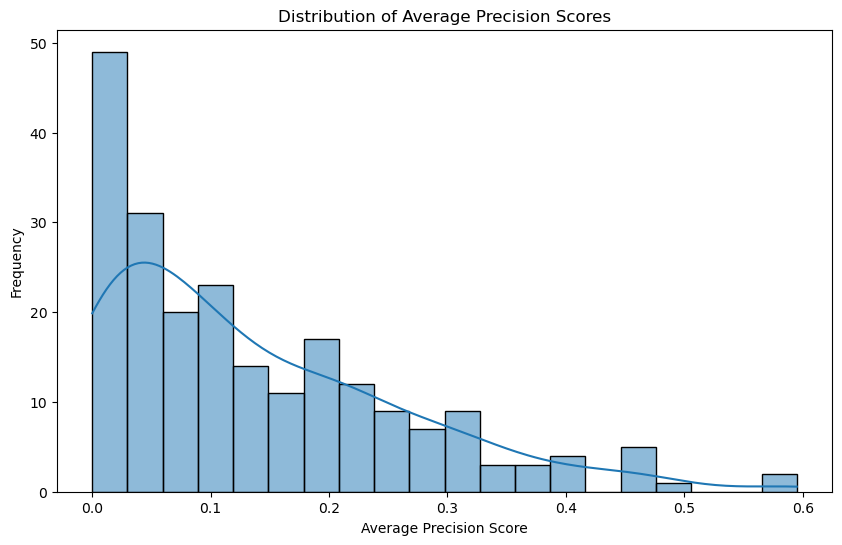

In [45]:
n=20
k=20

mean_average_precision(recommend_popular_movies, test_ratings, n, k) 

In [94]:
"""We could also tweak the mean average precision function a bit by using the output MAP@1 to @20 as the mean precision score for each movie and plot them against the popularity score of the same movies to get a correlation coeffieicent/linear regression between the popluarity of the predicted movies and their mean precision score for the users. """

def precision_by_popularity(recommend_popular_movies, test_ratings, n, k):
    # Generate the top n movies for each user
    test_data = get_top_n_movies(test_ratings, n).to_dict()

    # Recommend n popular movies (assumes recommend_popular_movies returns a sorted list of movie titles)
    recommended_movies = recommend_popular_movies(n).index.values.tolist()

    # Assign these recommendations to each user in the dictionary
    user_recommendations = {user: recommended_movies for user in test_data}
    
    precision_list = []
    
    for i in range(1,k+1):
        
        k = i

        # Compute the average precision for each user
        ap_scores = [average_precision(test_data[user], user_recommendations[user], k) for user in test_data]

        # Calculate the mean average precision
        map_score = np.mean(ap_scores)
        
        precision_list.append(map_score)
    
    #add the precision scores for each movie back to the dataframe
    pop_precision_df = recommend_popular_movies(n)
    pop_precision_df['precision'] = precision_list
    
    #correlation between movie popularity and average precision
    
    corr_results = pg.corr(x=pop_precision_df['popularity_score'], 
                       y=pop_precision_df['precision'], 
                       method='pearson')
    
    print(corr_results)
    
    #then regression, prob same as correlation indicated
    
    sns.regplot(x='popularity_score', y='precision', data=pop_precision_df)
    plt.title('Movie popularity x movie average recommendation precision')
    
    # define the linear model
    lr_model = smf.ols(formula="precision ~ popularity_score", data=pop_precision_df)

    # fit the model (get the best coefficients to minimize the residuals)
    lr =  lr_model.fit()
    print(lr.summary())

          n         r         CI95%         p-val       BF10  power
pearson  20  0.965017  [0.91, 0.99]  6.563440e-12  6.982e+08    1.0
                            OLS Regression Results                            
Dep. Variable:              precision   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     243.8
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           6.56e-12
Time:                        01:59:58   Log-Likelihood:                 45.783
No. Observations:                  20   AIC:                            -87.57
Df Residuals:                      18   BIC:                            -85.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025  

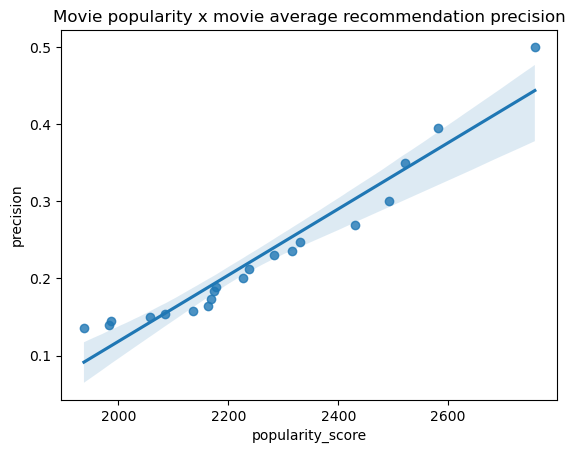

In [95]:
precision_by_popularity(recommend_popular_movies, test_ratings, n, k)